<a href="https://colab.research.google.com/github/ymuto0302/PJ2024/blob/main/GIS1_2_GeoPandas_ShapeFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用(1-2)：shape ファイルの利用
GeoPandas に予めビルトインされたデータセットは僅かである。

一方，現実の地理情報システムにおいて利用される地理情報データは **shape file** として提供される。

---
## shape file の入手
標準的な日本地図の shape file "全国市区町村界データ" が ESRIジャパンから提供されている。このデータが置かれいるURLを以下に示す。

https://www.esrij.com/products/japan-shp/

上記より "全国市区町村界データ" をダウンロードすると，japan_ver84.zip が得られる。これを適当なディレクトリへ展開する。

展開すると，"japan_ver84.shp" を含む複数のファイルが得られるから，それらを GoogleDrive 上の特定のフォルダに置いておく。

---
## (準備) GeoPandas のインストール (Google Colab の場合)

In [1]:
!pip install geopandas

---
### (準備) Google Drive のマウント
### (Preparation) Mounting Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## shapeファイルの利用
Google Drive 上に置いた shape file "japan_ver84.shp" を読み込み，その中身を見てみよう。

In [6]:
import geopandas as gpd

# シェイプファイルからのデータ読み込み
# (注意) ファイルの置き場所をフルパスで与えること
path = r'/content/drive/My Drive/BASE/GeoData/japan_ver84/japan_ver84.shp'
japan = gpd.read_file(path, encoding='shiftjis')

In [7]:
# データの中身を覗き見る
japan.head()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,geometry
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",239944,146024,0.542590,0.005128,"POLYGON ((141.34233 43.06682, 141.35520 43.068..."
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286054,153908,0.567773,0.007031,"POLYGON ((141.40839 43.18395, 141.40427 43.182..."
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",262298,144421,0.397203,0.006289,"POLYGON ((141.44698 43.15513, 141.44860 43.153..."
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",214050,124710,0.308211,0.003815,"POLYGON ((141.46569 43.10000, 141.46812 43.097..."
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",224435,129875,0.428316,0.005101,"POLYGON ((141.38479 43.04660, 141.38558 43.047..."


(コメント) 上記は北海道・札幌市が見えている。札幌市は政令指定都市であるため，区単位で POLYGON が設定されている。

(Comment) The above shows Sapporo City, Hokkaido. Since Sapporo is an ordinance-designated city, POLYGON is set by ward.

<Axes: >

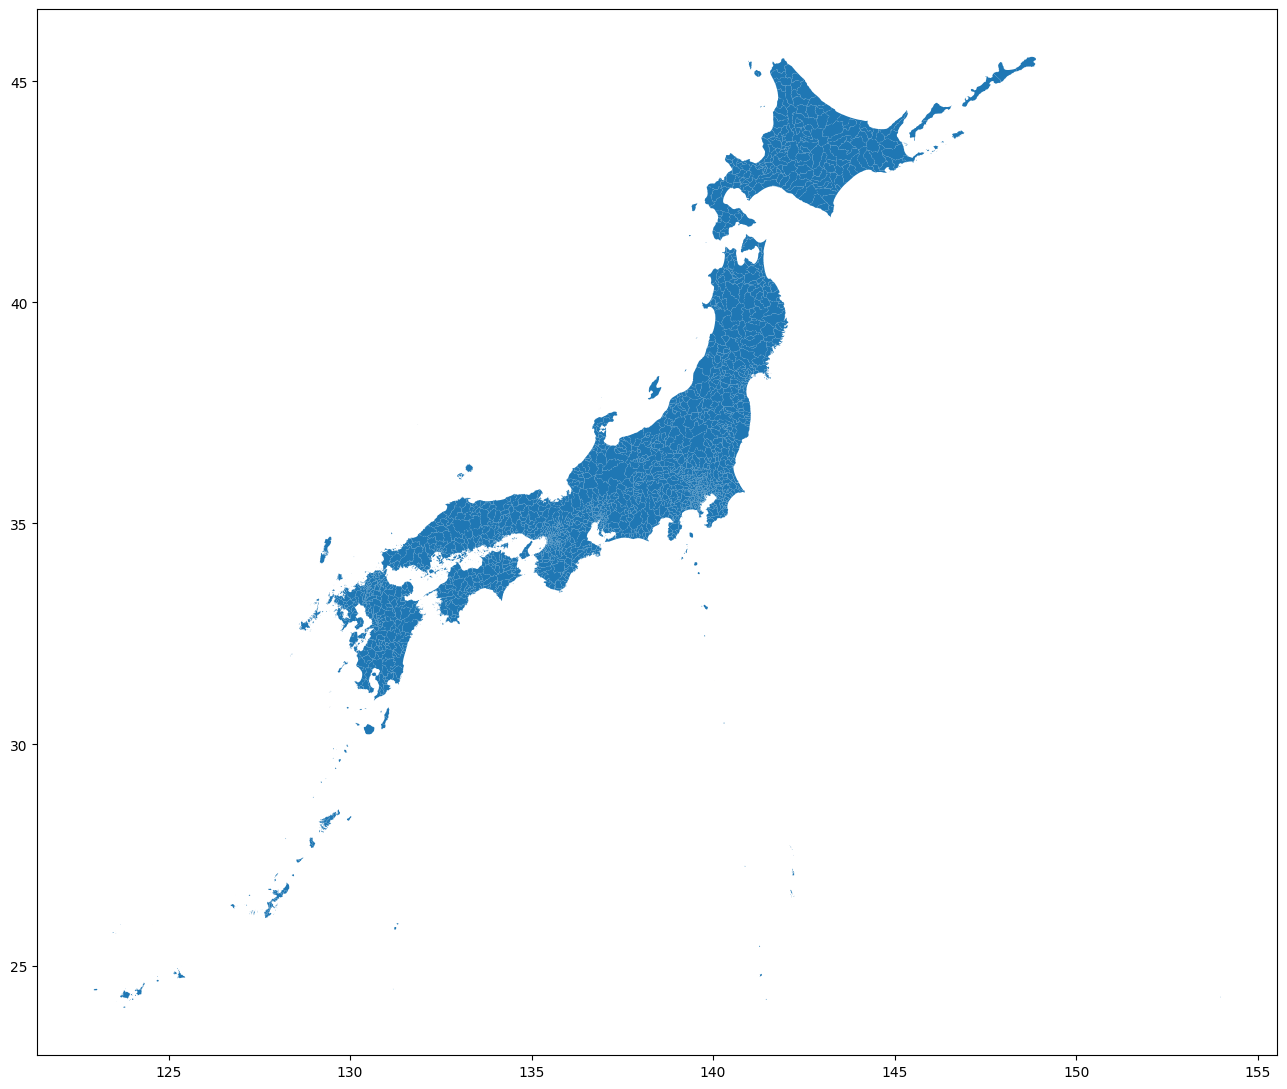

In [8]:
# 可視化
japan.plot(figsize=(16,16))

---
## 山口県のデータのみを取り出す
先の「全国市区町村界データ」から山口県のデータのみを取り出す。
山口県のデータを抽出するには，例によって条件文を加えればよい。

コード実行の結果，市町村別に MULTIPOLYGON が設定されていることが分かる。

In [9]:
yamaguchi = japan.copy()
yamaguchi = yamaguchi[japan['KEN']=='山口県'] # 条件を指定し，山口県のデータのみ抽出
yamaguchi.head() # 中身を覗き見る

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,geometry
1501,35201,山口県,None,None,None,下関市,Shimonoseki-shi,257553,129927,2.789449,0.070051,"MULTIPOLYGON (((130.93185 33.93428, 130.93056 ..."
1502,35202,山口県,None,None,None,宇部市,Ube-shi,163112,79744,1.426145,0.028011,"MULTIPOLYGON (((131.24604 33.92134, 131.24491 ..."
1503,35203,山口県,None,None,None,山口市,Yamaguchi-shi,190663,89739,2.804636,0.100118,"MULTIPOLYGON (((131.42100 33.96758, 131.42012 ..."
1504,35204,山口県,None,None,None,萩市,Hagi-shi,45508,23100,3.122479,0.068492,"MULTIPOLYGON (((131.39781 34.42499, 131.39601 ..."
1505,35206,山口県,None,None,None,防府市,Hofu-shi,115405,56298,1.130450,0.018495,"MULTIPOLYGON (((131.69697 33.94638, 131.69929 ..."


<Axes: >

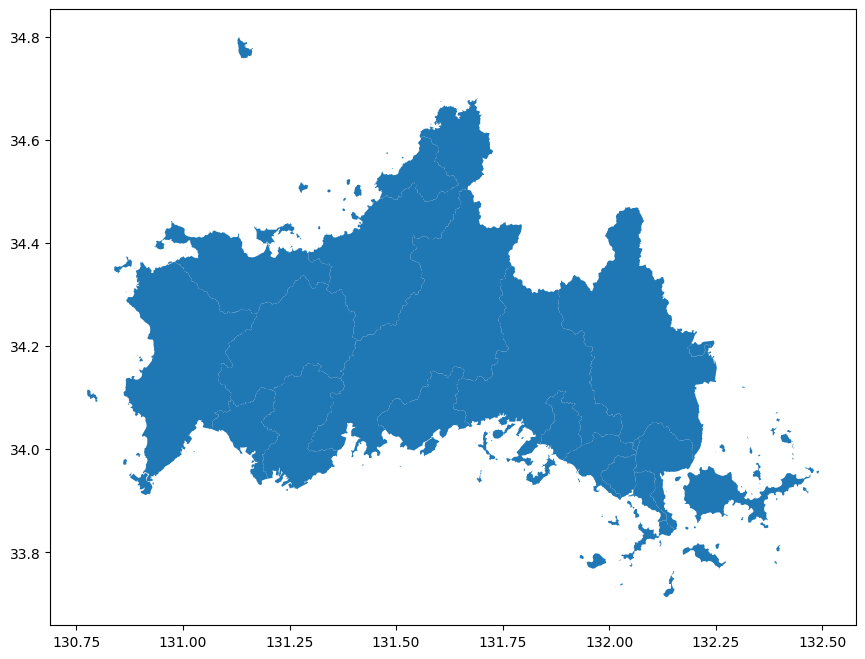

In [10]:
# 一応，可視化しておく
yamaguchi.plot(figsize=(16, 8))

---
## 複数の地理情報を重ねる
国土交通省の展開するGISホームページ  https://nlftp.mlit.go.jp/ では国土数値情報，国土調査結果等が公表されている。

このサイトから「山口県に設置されたバス停留所のデータ」を取得する。
手順は以下のとおり：

1. 上記 Web ページにて「国土数値情報」→「データダウンロード」をクリック
1. 国土数値情報ダウンロードサイトにて「4.交通：バス停留所（ポイント）」をクリック
1. バス停留所データのページにて「山口県」を選択し，山口県のデータ "P11-22_35_SHP.zip" をダウンロード
1. "P11-22_35_SHP.zip" を展開し，適当なディレクトリに設置

In [11]:
# シェイプファイルからのデータ読み込み
# bus_stop_path = '/content/drive/My Drive/BASE/GeoData/P11-10_35_GML/P11-10_35-jgd-g_BusStop.shp'
bus_stop_path = '/content/drive/My Drive/BASE/GeoData/Yamaguchi_BusStop/P11-22_35.shp'
bus_stop = gpd.read_file(bus_stop_path, encoding='shiftjis')

In [12]:
# データの中身を確認する
bus_stop.head()

,P11_001,P11_002,P11_003_01,P11_003_02,P11_003_03,P11_003_04,P11_003_05,P11_003_06,P11_003_07,P11_003_08,...,P11_004_28,P11_004_29,P11_004_30,P11_004_31,P11_004_32,P11_004_33,P11_004_34,P11_004_35,P11_005,geometry
0,市味,石見交通（株）,小浜江崎線,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (131.67386 34.65545)
1,田万川温泉,石見交通（株）,小浜江崎線,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (131.66132 34.65191)
2,道の駅たまがわ,石見交通（株）,小浜江崎線,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (131.66569 34.64930)
3,須潟,石見交通（株）,小浜江崎線,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (131.66225 34.64584)
4,萩阿武商工会前,石見交通（株）,小浜江崎線,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (131.66021 34.64335)


かなり横に長いデータフレームだから，(右端の)geometry の列のみをチェックする。
以下のとおり，バス停留所の緯度・経度が POINT として与えられていることが分かる。

In [14]:
# バス停名と位置情報のみを確認 → バス停留所の緯度・経度が POINT として与えられている。
bus_stop[['P11_001', 'geometry']].head()

,P11_001,geometry
0,市味,POINT (131.67386 34.65545)
1,田万川温泉,POINT (131.66132 34.65191)
2,道の駅たまがわ,POINT (131.66569 34.64930)
3,須潟,POINT (131.66225 34.64584)
4,萩阿武商工会前,POINT (131.66021 34.64335)


ここまでで

- 山口県の地理情報データ (yamaguchi)
- 山口県内のバス停留所データ (bus_stop)

が得られた。
これらを重ね合わせて可視化するには，ax を用いる。

ここで，ax は Artist と呼ばれるオブジェクトの一種であり，図を描くためのキャンバスと捉えればよい。

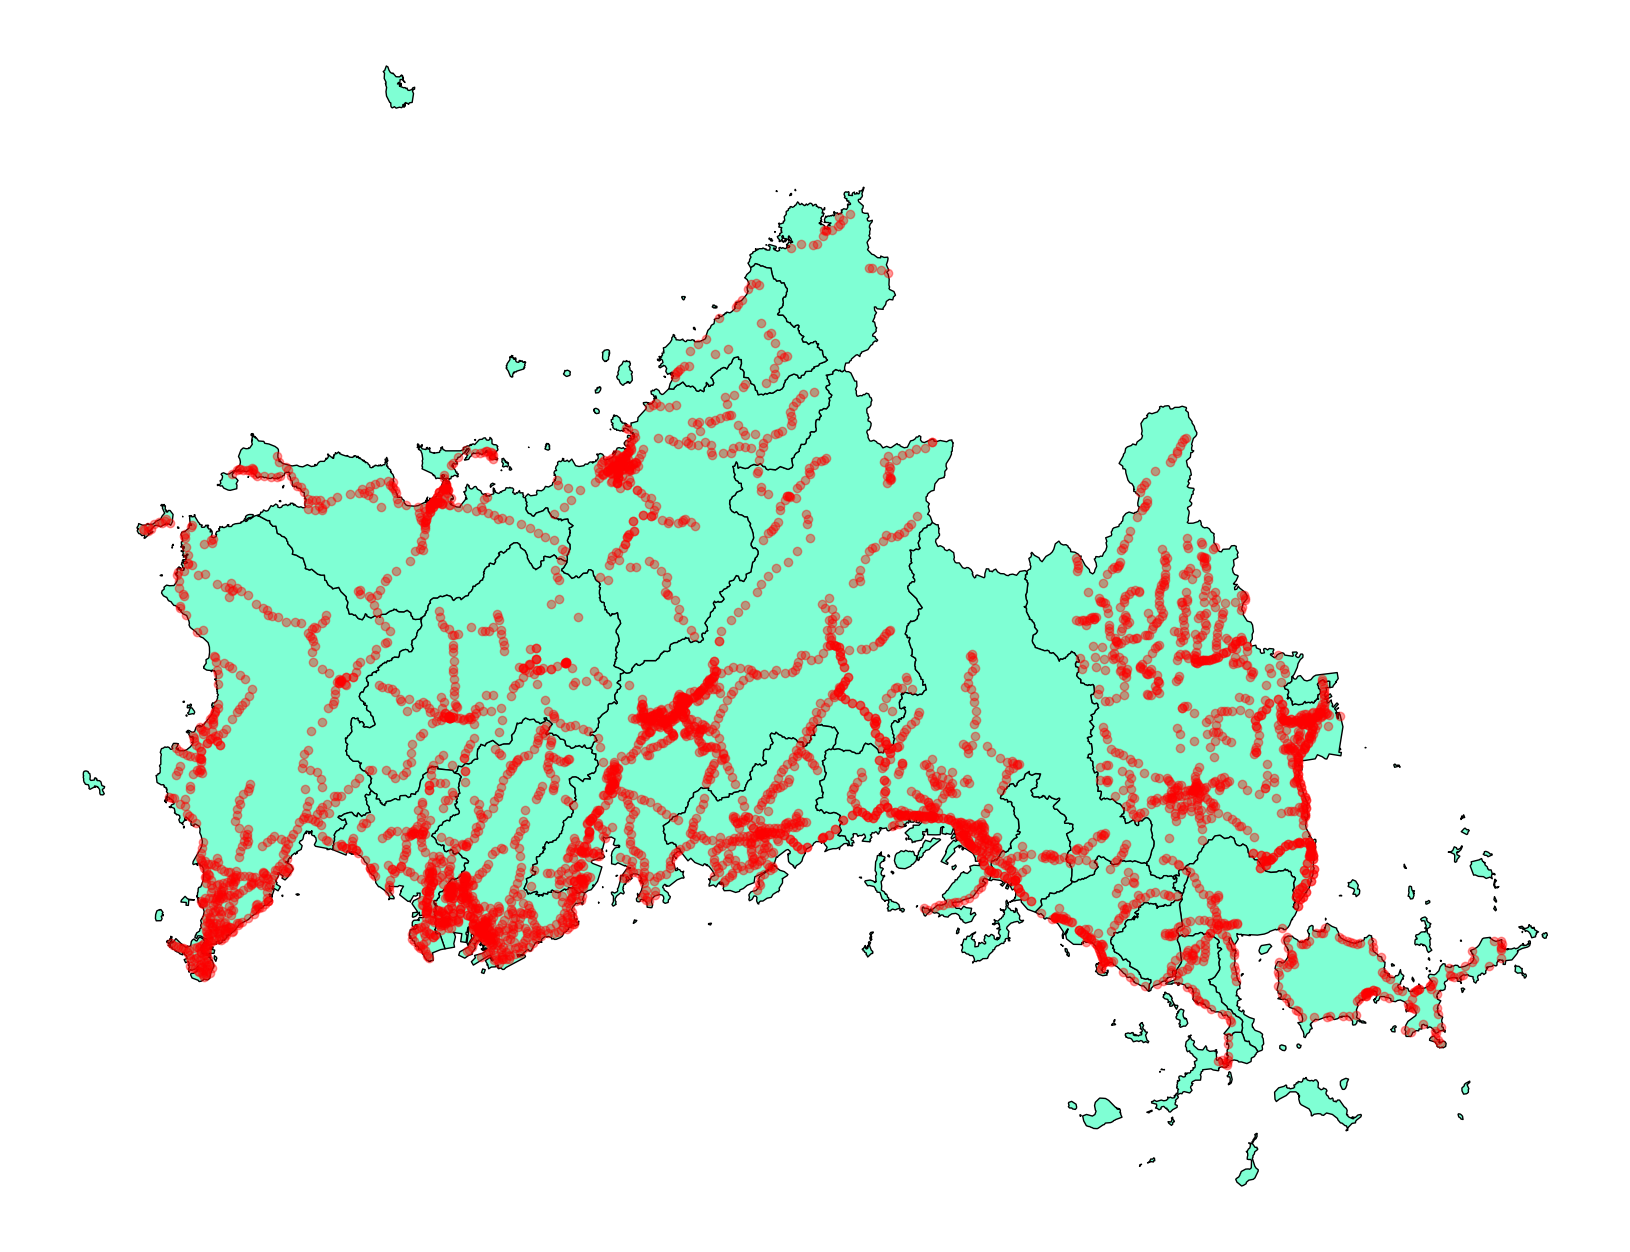

In [17]:
# 可視化
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(32,16))

# ２種類の GeoDataframe をそれぞれ plot する
yamaguchi.plot(ax=ax, color='aquamarine', edgecolor="black")
bus_stop.plot(ax=ax, color='red', alpha=0.4)

ax.axis('off')
plt.show()

## （腕試し）山口県に所在する医療機関
## (Assignment) Medical institutions located in Yamaguchi Pref.
「国土数値情報ダウンロード」から「3.地域：施設：医療機関（ポイント）→ 山口県（令和2年)」の shape file をダウンロードし，山口県の地図と重ねて可視化せよ。
